# Preprocessing & Training - Billboard Hot 100 & Spotify Track Data

## 1.0 Import Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [2]:
#unique song data
songs = pd.read_csv('../data/processed/songs_eda', index_col=0)
#genres by song
genres = pd.read_csv('../data/processed/genres_eda', index_col=0)

### 1.1 Unique Song Data

In [3]:
songs.head()

,Date,BB_Title,BB_Artist,PeakPos,Weeks,SP_Title,SP_Artist,SP_id,Genres,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2021-08-28,Stay,The Kid LAROI & Justin Bieber,1,6,STAY (with Justin Bieber),The Kid LAROI,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,0.591,...,-5.484,1.0,0.0483,0.0383,0.000000,0.1030,0.478,169.928,141806.0,4.0
1,2021-08-28,Bad Habits,Ed Sheeran,2,8,Bad Habits,Ed Sheeran,6PQ88X9TkUIAUIZJHW2upE,"pop,uk pop",0.808,...,-3.712,0.0,0.0348,0.0469,0.000031,0.3640,0.591,126.026,231041.0,4.0
2,2021-08-28,Good 4 U,Olivia Rodrigo,1,14,good 4 u,Olivia Rodrigo,4ZtFanR9U6ndgddUvNcjcG,pop,0.563,...,-5.044,1.0,0.1540,0.3350,0.000000,0.0849,0.688,166.928,178147.0,4.0
3,2021-08-28,Rumors,Lizzo Featuring Cardi B,4,1,Rumors (feat. Cardi B),Lizzo,6KgtcmCF9Ky68XC7ezxl3s,"dance pop,escape room,minnesota hip hop,pop,tr...",0.827,...,-5.524,0.0,0.0880,0.1300,0.000000,0.4180,0.607,118.992,172833.0,4.0
4,2021-08-28,Kiss Me More,Doja Cat Featuring SZA,3,19,Kiss Me More (feat. SZA),Doja Cat,748mdHapucXQri7IAO8yFK,"dance pop,pop",0.762,...,-3.541,1.0,0.0286,0.2350,0.000158,0.1230,0.742,110.968,208867.0,4.0


In [4]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4609 entries, 0 to 4608
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4609 non-null   object 
 1   BB_Title          4609 non-null   object 
 2   BB_Artist         4609 non-null   object 
 3   PeakPos           4609 non-null   int64  
 4   Weeks             4609 non-null   int64  
 5   SP_Title          4609 non-null   object 
 6   SP_Artist         4609 non-null   object 
 7   SP_id             4609 non-null   object 
 8   Genres            4571 non-null   object 
 9   danceability      4609 non-null   float64
 10  energy            4609 non-null   float64
 11  key               4609 non-null   float64
 12  loudness          4609 non-null   float64
 13  mode              4609 non-null   float64
 14  speechiness       4609 non-null   float64
 15  acousticness      4609 non-null   float64
 16  instrumentalness  4609 non-null   float64


#### 1.1.2 Song Attributes Only

In [5]:
song_atts = songs.drop(columns=['Date','Weeks','SP_Title','SP_Artist','SP_id','Genres'])

song_atts.head()

,BB_Title,BB_Artist,PeakPos,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Stay,The Kid LAROI & Justin Bieber,1,0.591,0.764,1.0,-5.484,1.0,0.0483,0.0383,0.000000,0.1030,0.478,169.928,141806.0,4.0
1,Bad Habits,Ed Sheeran,2,0.808,0.897,11.0,-3.712,0.0,0.0348,0.0469,0.000031,0.3640,0.591,126.026,231041.0,4.0
2,Good 4 U,Olivia Rodrigo,1,0.563,0.664,9.0,-5.044,1.0,0.1540,0.3350,0.000000,0.0849,0.688,166.928,178147.0,4.0
3,Rumors,Lizzo Featuring Cardi B,4,0.827,0.731,4.0,-5.524,0.0,0.0880,0.1300,0.000000,0.4180,0.607,118.992,172833.0,4.0
4,Kiss Me More,Doja Cat Featuring SZA,3,0.762,0.701,8.0,-3.541,1.0,0.0286,0.2350,0.000158,0.1230,0.742,110.968,208867.0,4.0


### 1.2 Genres Data

In [6]:
genres.head()

,BB_Title,BB_Artist,Genres
0,Stay,The Kid LAROI & Justin Bieber,australian hip hop
1,Bad Habits,Ed Sheeran,pop
2,Bad Habits,Ed Sheeran,uk pop
3,Good 4 U,Olivia Rodrigo,pop
4,Rumors,Lizzo Featuring Cardi B,dance pop


#### 1.2.2 Genres Data, Categorical Data Converted to Numeric

In [7]:
counts = genres['Genres'].value_counts()
counts

pop               1661
rap               1540
dance pop         1064
trap               973
hip hop            955
                  ... 
deep house           1
slow game            1
anime                1
folktronica          1
destroy techno       1
Name: Genres, Length: 444, dtype: int64

In [8]:
mask = genres['Genres'].isin(counts[counts < 10].index)
genres['Genres'][mask] = 'Other'

genres[genres.Genres == 'Other'].shape[0]

805

In [9]:
genres['Genres'] = genres['Genres'].fillna('Unknown')
genres.Genres.value_counts()

pop                    1661
rap                    1540
dance pop              1064
trap                    973
hip hop                 955
                       ... 
etherpop                 10
alternative hip hop      10
soul                     10
funk rock                10
dutch edm                10
Name: Genres, Length: 151, dtype: int64

In [10]:
#genres column split into individual columns for each genres using get_dummies()
genre_dummies = pd.concat([genres, pd.get_dummies(data=genres.Genres)],axis=1)\
                .groupby(by=['BB_Title','BB_Artist'],as_index=False).sum()

genre_dummies.head()

,BB_Title,BB_Artist,Other,Unknown,acoustic pop,adult standards,alt z,alternative hip hop,alternative metal,alternative r&b,...,tropical house,uk dance,uk pop,underground hip hop,urban contemporary,vapor trap,viral pop,viral rap,vocal jazz,west coast rap
0,#Beautiful,Mariah Carey Featuring Miguel,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,#SELFIE,The Chainsmokers,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,#thatPOWER,will.i.am Featuring Justin Bieber,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,$ave Dat Money,Lil Dicky Featuring Fetty Wap & Rich Homie Quan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,'Tis The Damn Season,Taylor Swift,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
merged = pd.merge(song_atts, genre_dummies, how='left', on=['BB_Title','BB_Artist'])

#merged

## 2.0 Preprocessing & Training

### 2.1 Train Test Split

In [12]:
X = merged.drop(columns=['PeakPos','BB_Title', 'BB_Artist'])
y = merged.PeakPos

#X = song_atts.drop(columns=['PeakPos','BB_Title', 'BB_Artist'])
#y = song_atts.PeakPos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [13]:
X_train.shape, X_test.shape

((3226, 164), (1383, 164))

### 2.2 Initial Metrics

#### 2.2.1 Using the Training Set Mean

In [14]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[51.01952883]])

In [15]:
y_tr_pred = dumb_reg.predict(X_train)
y_te_pred = dumb_reg.predict(X_test)

In [16]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -3.55893970638288e-05)

In [17]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(25.5627398127966, 25.371715216971293)

In [18]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(881.1499596044075, 867.4273187813042)

#### 2.2.2 Using Linear Regression

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [20]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [21]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [22]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.17290628671324715, 0.0766116863200611)

In [23]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(22.649099340962618, 23.78409020297938)

In [24]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(728.7935920516817, 800.9437440244475)

# WIP

In [25]:
#figure out feature importance
#did i do the genre category to numerical correctly?
#how can I better pare down the genres list? There is a lot of crossover between genres, could be messing with the results?

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

In [26]:
pipe = make_pipeline( 
    StandardScaler(),
    SelectKBest(f_regression, k=10),
    LinearRegression()
)

In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x000001629DD85A60>)),
                ('linearregression', LinearRegression())])

In [28]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [29]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.05885684591155271, 0.06265182935953528)

In [30]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(24.635650126315102, 24.439291992991265)

In [31]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [32]:
cv_scores = cv_results['test_score']
cv_scores

array([0.03261972, 0.05117151, 0.05139669, 0.04550057, 0.03481143])

In [33]:
np.mean(cv_scores), np.std(cv_scores)

(0.04309998459698052, 0.007978519477912432)

In [34]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.03, 0.06])

In [35]:
#trying to use GridSearchCV, see what happens
k = [k+1 for k in range(len(X_train.columns))]
#k = [k+1 for k in range(42)]
grid_params = {'selectkbest__k': k}

In [36]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [37]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000001629DD85A60>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [38]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [39]:
lr_grid_cv.best_params_

{'selectkbest__k': 39}

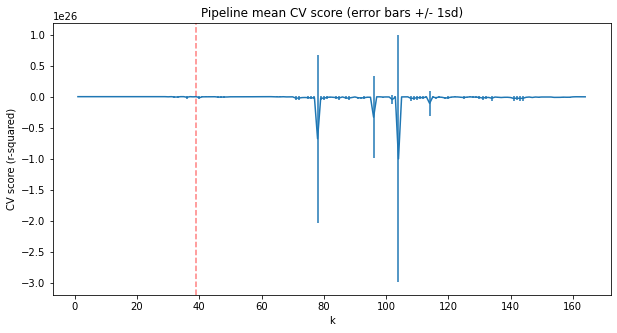

In [40]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');